In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings ('ignore')

In [82]:
#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리 
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#decisiontreeclassifier학습 
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=156)

In [83]:
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [84]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree2.dot", class_names=iris_data.target_names, \
    feature_names=iris_data.feature_names, impurity=True, filled=True)

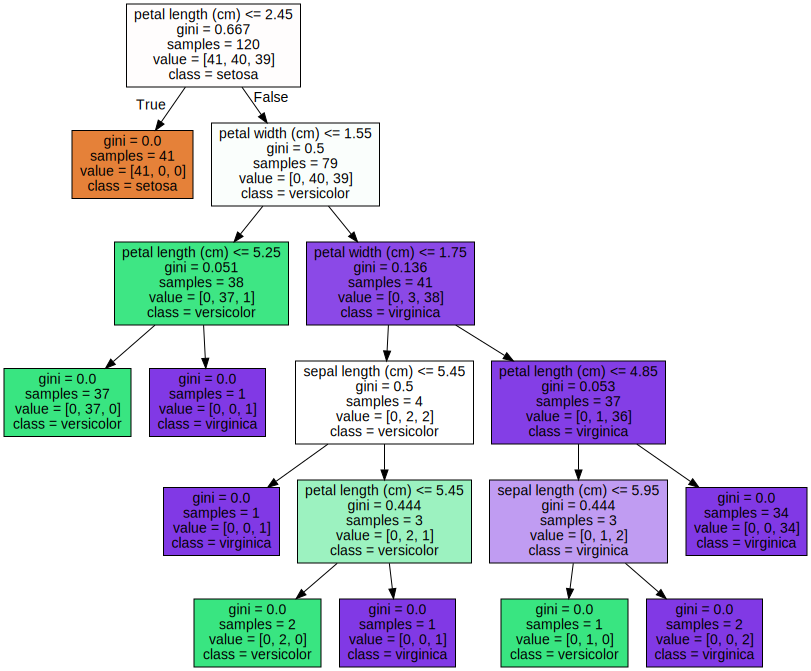

In [85]:
import graphviz
with open("tree2.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

지니계수는 홀수로 하는 것이 잘 나온다. 짝수는 오류가 잘 나온다. 

In [86]:
dt_clf

DecisionTreeClassifier(random_state=156)

In [87]:
dt_clf.feature_importances_
#각 피쳐의 중요도가 나온다.  

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [88]:
import mapf

ModuleNotFoundError: No module named 'mapf'

Feature importances:
 [0.025 0.    0.555 0.42 ]
sepal length (cm),0.02500520941862888
sepal width (cm),0.0
petal length (cm),0.5549028149313102
petal width (cm),0.42009197565006084


<AxesSubplot:>

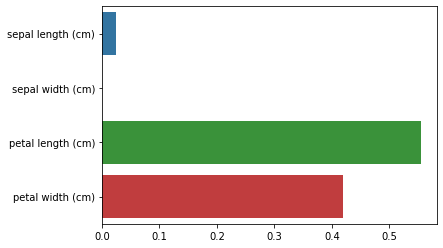

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance추출 
print(f'Feature importances:\n {np.round(dt_clf.feature_importances_,3)}')

#feture importance매핑 
for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name},{value}')

#feature importance를 column별로 시각화 
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

### 타이타익 데이터 decisiontree하기 
1. 5개 feature뽑기 
2. logistic regression으로 데이터 80:20으로 훈련셋과 테스트 셋 나누기 
3. accuracy 검증하기 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd 

df = pd.read_csv('./dataset/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df = df[['Survived','Pclass','Sex','Age','Cabin']]
print(titanic_df)

     Survived  Pclass     Sex   Age Cabin
0           0       3    male  22.0   NaN
1           1       1  female  38.0   C85
2           1       3  female  26.0   NaN
3           1       1  female  35.0  C123
4           0       3    male  35.0   NaN
..        ...     ...     ...   ...   ...
886         0       2    male  27.0   NaN
887         1       1  female  19.0   B42
888         0       3  female   NaN   NaN
889         1       1    male  26.0  C148
890         0       3    male  32.0   NaN

[891 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
   df['Age'].fillna(df['Age'].mean(),inplace = True)
   df['Cabin'].fillna('N',inplace = True)
   #df['Embarked'].fillna('N', inplace=True) 
   #df['Fare']. fillna(0,inplace=True)
   return df

#머신러닝에 불필요한 속성 제거 
def drop_features(df):
   #df.drop(['PassengerId','Name','Ticket'],axis= 1,inplace = True)
   return df #리턴하지 않으면 오류가 난다. 

#레이블 인코딩 수행 
def format_features(df):
   df['Cabin'] = df['Cabin'].str[ :1]
   features = ['Cabin', 'Sex'] 
   for feature in features:
     le = LabelEncoder()
     le = le.fit(df[feature])
     df[feature] = le.transform(df[feature])
   return df #def는 리턴해주지 않으면 결과값이 출력되지 않는다.  
     
#앞에서 설정한 Data Preprocessing 함수 호출 
def transform_features(df):
   df = fillna(df)
   df = drop_features(df)
   df = format_features(df)
   return df

In [ ]:
transform_features(titanic_df)
print(titanic_df)

     Survived  Pclass  Sex        Age  Cabin
0           0       3    1  22.000000      7
1           1       1    0  38.000000      2
2           1       3    0  26.000000      7
3           1       1    0  35.000000      2
4           0       3    1  35.000000      7
..        ...     ...  ...        ...    ...
886         0       2    1  27.000000      7
887         1       1    0  19.000000      1
888         0       3    0  29.699118      7
889         1       1    1  26.000000      2
890         0       3    1  32.000000      7

[891 rows x 5 columns]


In [ ]:
y_titanic_df = titanic_df['Survived'] #레이블 값 만들어 Y값 데이터로 저장 
x_titanic_df = titanic_df.drop(['Survived'],axis=1) #레이블값을 제외한 인풋값 저장 
x_titanic_df #전처리 잘 됐는지 한번 확인해주기 

,Pclass,Sex,Age,Cabin
0,3,1,22.000000,7
1,1,0,38.000000,2
2,3,0,26.000000,7
3,1,0,35.000000,2
4,3,1,35.000000,7
...,...,...,...,...
886,2,1,27.000000,7
887,1,0,19.000000,1
888,3,0,29.699118,7
889,1,1,26.000000,2


In [ ]:
y_titanic_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
#DecisionTree Classifier 생성
titanic_clf = DecisionTreeClassifier(random_state=156)

#데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리 
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

#decisiontreeclassifier학습 
titanic_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=156)

Feature importances:
 [0.132 0.38  0.409 0.079]
Pclass,0.1320708289340183
Sex,0.38019809895446105
Age,0.409035523875026
Cabin,0.07869554823649463


<AxesSubplot:>

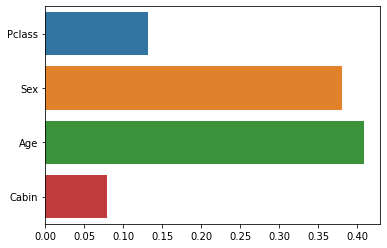

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#결정나무 내 속성인 Feature importances 활용 
#feature importance추출 
print(f'Feature importances:\n {np.round(titanic_clf.feature_importances_,3)}') 

#feture importance매핑 
for name,value in zip(x_titanic_df.columns, titanic_clf.feature_importances_):
    print(f'{name},{value}')

#feature importance를 column별로 시각화 
sns.barplot(x=titanic_clf.feature_importances_,y=x_titanic_df.columns)

In [89]:
from sklearn.metrics import accuracy_score

lt_clf= LogisticRegression() 

lt_clf.fit(x_train,y_train)
lt_pred = lt_clf.predict(x_test)
print(f"LogisticRegression 정확도: {accuracy_score(y_test,lt_pred): 4f}")

LogisticRegression 정확도:  0.933333


### ------------

### 결정 트리 과적합

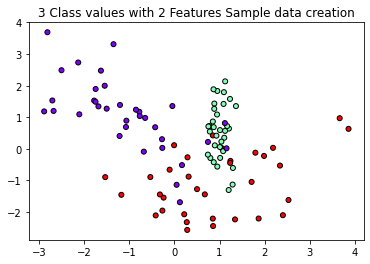

In [98]:
from sklearn.datasets import make_classification 
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해 feature는 2개, 결정값 클래스는 3가지 유형의 classification샘플 데이터 생성 
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨 
plt.scatter(x_features[:,0],x_features[:,1],marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [99]:
print(x_features)

[[ 0.12041909 -1.68941375]
 [ 1.09665605  1.79445113]
 [ 0.88426577  1.43370121]
 [ 0.95048011 -0.56202253]
 [ 1.04421447  0.02899023]
 [ 0.50102164 -1.27508231]
 [ 1.10447379  0.35117341]
 [-2.5077599   2.48857017]
 [-0.00811816  0.11564734]
 [ 0.31338067 -0.87926516]
 [-0.04687748  1.35489986]
 [ 1.20888898  0.64232637]
 [ 1.71173001 -1.04637674]
 [ 1.29670808 -0.6054158 ]
 [ 1.24188996 -0.3819388 ]
 [-1.78273822  1.52817583]
 [-1.50514147  1.27186707]
 [ 0.87163989 -0.42276158]
 [ 2.53026908 -1.61974843]
 [ 0.95000368  1.83240861]
 [-1.53716448 -0.89497353]
 [-2.13650855  2.73389996]
 [ 1.01037788  0.59402713]
 [ 1.9876467  -0.22375521]
 [ 1.12463497  2.13646176]
 [-0.65122279  0.97865617]
 [ 0.85144036  0.42548085]
 [-0.10789457 -0.65942376]
 [-0.41699944 -2.10727211]
 [-0.77993003  1.17281753]
 [ 2.34137626 -0.52950108]
 [ 0.79625824 -0.28978825]
 [ 1.3641878   1.35329628]
 [ 0.04699455 -1.13830278]
 [ 0.77274433  0.72303297]
 [-1.20971021  1.38961257]
 [-1.63281739  2.47584639]
 

### viualize_boundary()생성 

In [ ]:
import numpy as np

#classifier의 decision Boundary를 시각화 하는 함수 
def visualize_boundary(model,x,y):
    fig,ax = plt.subplots() #서브 플롯을 나눠 fig와 ax에 저장 

    #학습 데이터 scatter plot으로 나타내기 
    ax.scatter(x[:,0],x[:,1],c=y,s=25,cmap='rainbow',edgecolor='k',clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start,ylim_end = ax.get_ylim()

    #호출 파라미터로 들어온 training 데이타로 model학습 
    model.fit(x,y)
    #meshgrid 형태인 모든 좌표값으로 예측 수행 
    xx,yy =np.meshgrid(np.linspace(xlim_start,xlim_end,num=200),np.linspace(ylim_start,ylim_end,num=200))
    z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    #coutourf()를 이용해 class boundary를 visualization수행
    n_classes=len(np.unique(y))
    contours=ax.contourf(xx,yy,z,alpha=0.3,
                            levels =np.arange(n_classes+1)-0.5,
                            camp='rainbow',clim=(y.min(), y.max()),zorder=1)




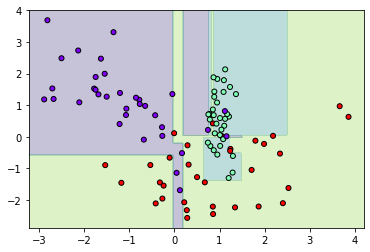

In [100]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리생성 제약 없는 결정 트리의 Decision Boundary시각화 
dt_clf = DecisionTreeClassifier().fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

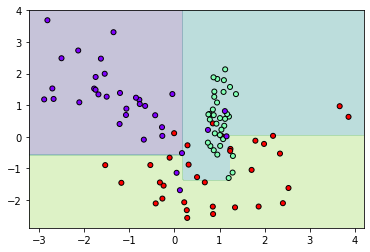

In [101]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리생성 제약 없는 결정 트리의 Decision Boundary시각화 
#min_samples_leaf=6 하이퍼 파라미터를 조절하는 것만으로도 과적합을 막을 수 있다. 
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)


### voting Classifier 

In [103]:
import pandas as pd 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [106]:
#개별 모데은 로지스틱 회귀와 KNN이다. 
lr_clf = LogisticRegression()
knn_clf =KNeighborsClassifier(n_neighbors=8)

#개별모델을 소프트 보팅 기반의 앙상블 보델로 구현한 ㄴ 분류기 
vo_clf = VotingClassifier( estimators= [('LR', lr_clf),('KNN',knn_clf)], voting='soft')

x_train, x_test,y_train,y_test = train_test_split(cancer.data , cancer.target, test_size=0.2, random_state=156)

#votingClassifier 학습/예측/평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print(f"voting 분류기 정확도 {accuracy_score(y_test,pred)}")

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 {accuracy_score(y_test,pred),4}')

voting 분류기 정확도 0.9473684210526315
LogisticRegression 정확도 (0.9385964912280702, 4)
KNeighborsClassifier 정확도 (0.9385964912280702, 4)
